In [1]:
import pandas as pd
import numpy as np
#import prince 
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Importation de la base et visualisation des données 
#Kacim #df = pd.read_csv("C:\\Users\\Home\\Desktop\\Statapp\\series_progress_sampled.csv")
df = pd.read_csv(r"C:\Users\mira_\Documents\ENSAE\2A\statapp\series_progress_sampled.csv")
df.head(5)

c:\Users\mira_\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,learner_id,unique_learner_id,creation_serie,score,series_id,status,type,is_freemium,score_pct,training_session_id,is_before_theory_exam_success,course_id,course_name,course_order
0,2364513,-92590771937651771,2021-10-01T19:01:16.000Z,16.0,9111,complete,exam,0,0.400,302234e2-7f5c-415a-ad46-f77067fb6da4,True,NaN,NaN,NaN
1,1987716,3392312726569945104,2021-08-18T22:59:12.000Z,19.0,6967,complete,exam,0,0.475,07efe275-053d-4dc6-943e-4db2835ccc01,True,NaN,NaN,NaN
2,304008,-1708221254721400777,2021-08-07T16:58:46.000Z,19.0,6247,complete,exam,0,0.475,fdaa6cf0-391f-46be-bcd0-2733da668d43,True,NaN,NaN,NaN
3,584245,-2588731723289132657,2019-06-16T11:02:52.000Z,18.0,71,complete,exam,0,0.450,20d4b7f2-6c48-42e6-88a6-21ca16d20265,True,NaN,NaN,NaN
4,1276434,-479177578173813811,2021-01-31T21:30:01.000Z,14.0,156,complete,exam,0,0.350,aa849f7e-4d50-4780-b6a0-7feb3cfe09cc,False,NaN,NaN,NaN


# Etude des scores

In [3]:
df['score_pct'].describe()

count    3.028067e+06
mean     7.667635e-01
std      1.526430e-01
min      0.000000e+00
25%      6.750000e-01
50%      8.000000e-01
75%      9.000000e-01
max      1.000000e+00
Name: score_pct, dtype: float64

## Scores par learners

In [22]:
#on regroupe par learner

df2 = df.groupby(['learner_id'])

In [9]:
#creation de la serie des moyennes de chaque learner en scores (en pourcentage) 

mn_by_learner = pd.Series(df2['score_pct'].mean())
mn_by_learner.head(5)

learner_id
77     0.950000
89     0.777059
223    0.725000
268    0.812500
429         NaN
Name: score_pct, dtype: float64

In [14]:
nb_de_series_par_lrn = df2['creation_serie'].count()

In [19]:
nb_de_series_par_lrn.describe()

count    39777.000000
mean       109.176484
std        242.919271
min          1.000000
25%          2.000000
50%         36.000000
75%        125.000000
max      13389.000000
Name: creation_serie, dtype: float64

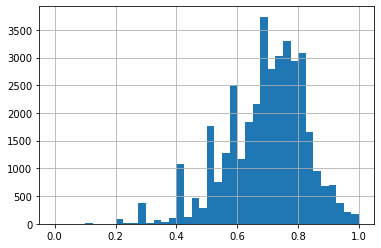

In [6]:
#histogramme des moyennes de score en pct
mn_by_learner.hist(bins=40)

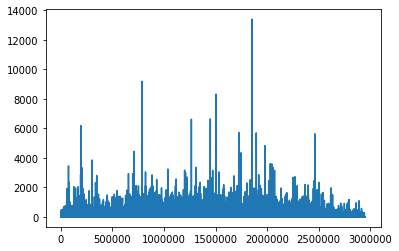

In [21]:
plt.plot(nb_de_series_par_lrn)

# Etude de l'assiduité